Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [116]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [117]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10]
y_train = [3, 5, 7, 9, 11] #y = 2x +1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise
# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

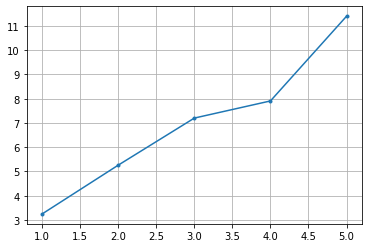

In [118]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [119]:
useRandom = False

In [120]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**
$$ H(x)=Wx + b $$

In [121]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example : 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [122]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [123]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)


**Launch the graph in a session**

In [124]:
sess = tf.Session()

**Initializes global variables in the graph.** 

In [125]:
sess.run(tf.global_variables_initializer())

In [126]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 241.26724 	 5.656044 	 4.6200933
50 	 0.8519357 	 1.4042186 	 3.0910163
100 	 0.68835765 	 1.4805261 	 2.8154995
150 	 0.5717719 	 1.5449519 	 2.5829012
200 	 0.4886796 	 1.5993418 	 2.3865366
250 	 0.42945844 	 1.6452591 	 2.2207608
300 	 0.3872499 	 1.6840241 	 2.080807
350 	 0.357167 	 1.7167503 	 1.9626547
400 	 0.3357268 	 1.7443787 	 1.8629078
450 	 0.32044584 	 1.767703 	 1.7786989
500 	 0.30955476 	 1.7873943 	 1.7076074
550 	 0.30179253 	 1.8040181 	 1.6475905
600 	 0.29626018 	 1.8180524 	 1.5969218
650 	 0.2923173 	 1.8299005 	 1.5541464
700 	 0.28950706 	 1.839903 	 1.5180345
750 	 0.28750423 	 1.8483474 	 1.4875475
800 	 0.28607675 	 1.8554764 	 1.4618099
850 	 0.2850594 	 1.8614947 	 1.4400812
900 	 0.28433424 	 1.8665758 	 1.4217371
950 	 0.2838174 	 1.8708652 	 1.4062511
1000 	 0.283449 	 1.8744864 	 1.3931774


Text(0, 0.5, 'loss')

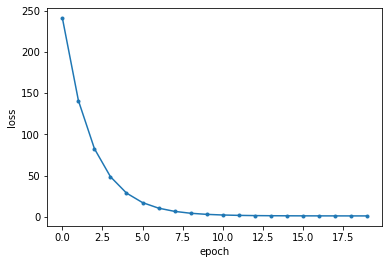

In [127]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

TODO: w, b의 epoch 에 따른 변화 그래프 넣기 !


**학습완료**

In [128]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [129]:
print(w1, b1)

1.8744864 1.3931774


In [130]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 1.8744864x + 1.3931774


Text(0.5, 1.0, 'y = 1.8744864x + 1.3931774')

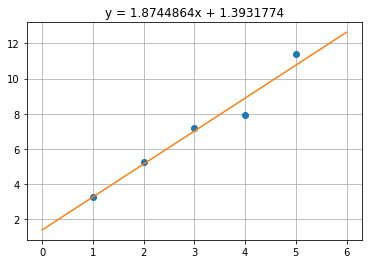

In [131]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

###HomeWork

In [ ]:
### 스스로 해보기
#아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다. 

#* 예1) 노이즈를 다르게 준다
#```
#x_train = [1, 2, 3]
#y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
#```
#* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.

#* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.
#```
#y=3x-5 
#y=1.2x + 3
#```

#* 예4) 초기값인 w0, b0를 다르게 설정해본다.
#```
#w0 = 7.0;
#b0 = 5.0;
#```

In [133]:
x_train = [1, 2, 3, 4, 5]
y_train = [1+0.2, 3-0.1, 5+0.1, 7-0.2, 9+0.2]

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

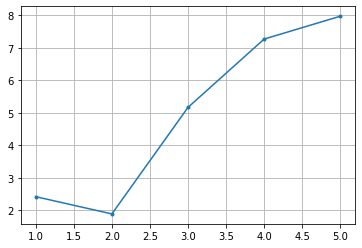

In [134]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [135]:
useRandom = False

In [136]:
w0 = 20.0;
b0 = 9.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

In [137]:
hypothesis = x_train * W + b

In [138]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

In [139]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [140]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [141]:
nb_epoch = 3001
vloss = [] 

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: 
        w1 = sess.run(W)[0] 
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 2785.3894 	 15.422465 	 7.71886
50 	 2.3328786 	 0.7997939 	 3.0608454
100 	 1.8435243 	 0.93176633 	 2.5843046
150 	 1.4947532 	 1.0431979 	 2.1820014
200 	 1.2461771 	 1.1372715 	 1.8423656
250 	 1.0690129 	 1.2166908 	 1.555637
300 	 0.9427444 	 1.2837387 	 1.3135728
350 	 0.85275066 	 1.3403423 	 1.1092157
400 	 0.78861046 	 1.3881285 	 0.9366923
450 	 0.7428967 	 1.4284708 	 0.7910435
500 	 0.7103156 	 1.4625291 	 0.66808295
550 	 0.6870944 	 1.4912817 	 0.56427634
600 	 0.67054427 	 1.5155556 	 0.47664
650 	 0.65874875 	 1.5360483 	 0.40265515
700 	 0.65034175 	 1.5533485 	 0.34019512
750 	 0.64434993 	 1.5679542 	 0.28746483
800 	 0.64007956 	 1.5802845 	 0.24294841
850 	 0.63703585 	 1.5906941 	 0.20536649
900 	 0.6348666 	 1.599482 	 0.17363887
950 	 0.63332057 	 1.6069013 	 0.1468535
1000 	 0.6322187 	 1.6131647 	 0.12424059
1050 	 0.63143337 	 1.6184524 	 0.10515009
1100 	 0.6308736 	 1.6229163 	 0.08903348
1150 	 0.6304747 	 1.6266849 	 0.07542758
1200 	 0.6301903 	 1.6

Text(0, 0.5, 'loss')

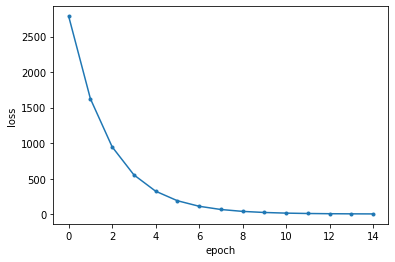

In [142]:
plt.plot(vloss[:15],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')